In [ ]:
import numpy as np
import astropy
import time
from datetime import datetime
from astropy.time import Time


def mjdtounix(mjd):
    """Return a floating point UNIX timestamp for a given MJD"""
    return Time(mjd,format='mjd',scale='utc').unix

def unix2mjd(unixtime):
    """Convert UNIX timestamp into MJD"""
    dt = Time(unixtime,format='unix',scale='utc')
    return dt.mjd

In [ ]:

def tjdsodtounix(tjd,sod):
    '''Convert TJD and SOD pair to unix timestamp'''
    return mjdtounix(tjd+40000)+sod

def tjdsodtodt(tjd,sod):
    '''Convert TJD and SOD pair to datetime'''
    return datetime.fromtimestamp(tjdsodtounix(tjd,sod)) 
def unix2met(unixtime):
    """Convert Unix time to Spacecraft time"""
    return int(unixtime) - time.mktime((2001,1,1,0,0,0,0,0,0))+(unixtime-int(unixtime))


In [ ]:
import numpy as np
import astropy
import plotly
import sys
import math
from matplotlib import pyplot as plt
from astropy.utils import data
from astropy.io import fits
import time


In [ ]:
def getquadsLC(obsid):
    url = 'https://www.swift.ac.uk/archive/reproc/'+obsid+'/bat/rate/sw'+obsid+'brtqd.lc.gz'
    file = data.download_file(url)
    lc_fits = fits.open(file)
    return lc_fits
def makequadsLC(lc_fits, T0,window):
	lc_fits_data = lc_fits[1].data

	utcf = lc_fits[1].header['utcfinit']
	#GRBname = sys.argv[1]
	#obsid = sys.argv[2]
	#T0 = lc_fits_data[0][0]

	xmin = -(window/2)
	xmax = window/2


	time = []
	count_15_350 = []
	count_15_25 = []
	count_25_50 = []
	count_50_100 = []
	count_100_350 = []
	#count_err = []
	dummy = 0
	flag_quad_rate = 0
	count_tot = 0
	for i in range(len(lc_fits_data)):
		#if(dummy != 1):
		if(xmin <= lc_fits_data[i][0]-T0+utcf <= xmax):
			flag_quad_rate = 1
			count_tot = 0.0
			count_15_25_tot = 0.0
			count_25_50_tot = 0.0
			count_50_100_tot = 0.0
			count_100_350_tot = 0.0
			for i_band in range(0,4):
				for i_quad in range(1,5):
					count_tot += lc_fits_data[i][i_quad][i_band]
					if(i_band == 0):
						count_15_25_tot += lc_fits_data[i][i_quad][i_band]
					if(i_band == 1):
																					count_25_50_tot += lc_fits_data[i][i_quad][i_band]
					if(i_band == 2):
																					count_50_100_tot += lc_fits_data[i][i_quad][i_band]
					if(i_band == 3):
																					count_100_350_tot += lc_fits_data[i][i_quad][i_band]

			time.append(lc_fits_data[i][0]-T0+utcf)
			time.append(lc_fits_data[i][0]-T0+1.6+utcf) ## create fake 1.6s bin plot

			count_15_350.append(count_tot)
			count_15_350.append(count_tot)

			count_15_25.append(count_15_25_tot)
			count_15_25.append(count_15_25_tot)

			count_25_50.append(count_25_50_tot)
			count_25_50.append(count_25_50_tot)

			count_50_100.append(count_50_100_tot)
			count_50_100.append(count_50_100_tot)

			count_100_350.append(count_100_350_tot)
			count_100_350.append(count_100_350_tot)
			#count.append(count_tot)
			#count_err.append(lc_fits_data[i][2])

		

	lc_fits.close

	#for i in range(len(time)):
	#	print time[i], rate_15_25[i], rate_25_50[i], rate_50_100[i], rate_100_350[i], rate_15_350[i]

	### set fig size
	fig = plt.figure(1, figsize=(10,16))

	## 1st figure
	fig1 = fig.add_subplot(5,1,1)

	plt.plot(time,count_15_25,color='k', label='15-25 keV')
	#plt.xlim(-1000.0,300.0)
	plt.title('quad-rate data')
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 2st figure
	fig2 = fig.add_subplot(5,1,2,sharex=fig1)

	plt.plot(time,count_25_50,color='r', label='25-50 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.title(GRBname)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 3st figure
	fig3 = fig.add_subplot(5,1,3,sharex=fig1)

	plt.plot(time,count_50_100,color='g', label='50-100 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.title(GRBname)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 4st figure
	fig4 = fig.add_subplot(5,1,4,sharex=fig1)

	plt.plot(time,count_100_350,color='b', label='100-350 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.title(GRBname)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 5st figure
	fig5 = fig.add_subplot(5,1,5,sharex=fig1)

	#plt.errorbar(time,rate, yerr=rate_err,linestyle="None", marker="o", markersize=3, color="k")
	plt.plot(time,count_15_350,color='purple', label='15-350 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.title(GRBname)
	#plt.ylim(9500.0,1.2e+4)
	plt.xlabel('Time since T0 (T0 = ' + str(T0-utcf) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	#plt.xlim(-20.0,60.0)

	#plt.xlim(xmin,xmax)
	plt.show()



In [ ]:
def get64msLC(obsid):
    url = 'https://www.swift.ac.uk/archive/reproc/'+obsid+'/bat/rate/sw'+obsid+'brtms.lc.gz'
    file = data.download_file(url)
    lc_fits = fits.open(file)
    return lc_fits

def make64msLC(lc_fits, T0,window):
	lc_fits_data = lc_fits[1].data
	utcf = lc_fits[1].header['utcfinit']

	xmin = -window/2
	xmax = window/2

	time = []
	count_15_350 = []
	count_15_25 = []
	count_25_50 = []
	count_50_100 = []
	count_100_350 = []
	#count_err = []
	dummy = 0
	flag_ms_rate = 0
	for i in range(len(lc_fits_data)):
		#if(dummy != 1):
		if(xmin <= lc_fits_data[i][0]-T0+utcf <= xmax):
			flag_ms_rate = 1
			count_tot = 0.0
			count_15_25_tot = 0.0
			count_25_50_tot = 0.0
			count_50_100_tot = 0.0
			count_100_350_tot = 0.0
			for i_band in range(0,4):
				count_tot += lc_fits_data[i][1][i_band]
				if(i_band == 0):
					count_15_25_tot += lc_fits_data[i][1][i_band]
				if(i_band == 1):
					count_25_50_tot += lc_fits_data[i][1][i_band]
				if(i_band == 2):
					count_50_100_tot += lc_fits_data[i][1][i_band]
				if(i_band == 3):
					count_100_350_tot += lc_fits_data[i][1][i_band]

			time.append(lc_fits_data[i][0]-T0+utcf)
			time.append(lc_fits_data[i][0]-T0+0.064+utcf) ## create fake 0.064s bin plot

			count_15_350.append(count_tot)
			count_15_350.append(count_tot)

			count_15_25.append(count_15_25_tot)
			count_15_25.append(count_15_25_tot)

			count_25_50.append(count_25_50_tot)
			count_25_50.append(count_25_50_tot)

			count_50_100.append(count_50_100_tot)
			count_50_100.append(count_50_100_tot)

			count_100_350.append(count_100_350_tot)
			count_100_350.append(count_100_350_tot)
			#count.append(count_tot)
			#count_err.append(lc_fits_data[i][2])


	#for i in range(len(time)):
	#	print time[i], rate_15_25[i], rate_25_50[i], rate_50_100[i], rate_100_350[i], rate_15_350[i]

	### set fig size
	fig = plt.figure(1, figsize=(10,16))

	## 1st figure
	fig1 = fig.add_subplot(5,1,1)

	plt.plot(time,count_15_25,color='k', label='15-25 keV')
	#plt.xlim(-1000.0,300.0)
	plt.title('64ms-rate data')
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 2st figure
	fig2 = fig.add_subplot(5,1,2,sharex=fig1)

	plt.plot(time,count_25_50,color='r', label='25-50 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 3st figure
	fig3 = fig.add_subplot(5,1,3,sharex=fig1)

	plt.plot(time,count_50_100,color='g', label='50-100 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 4st figure
	fig4 = fig.add_subplot(5,1,4,sharex=fig1)

	plt.plot(time,count_100_350,color='b', label='100-350 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.ylim(9500.0,1.2e+4)
	#plt.xlabel('Time since T0 (T0 = ' + str(T0) + 's) [s]')
	plt.ylabel('Counts')
	plt.legend()

	## 5st figure
	fig5 = fig.add_subplot(5,1,5,sharex=fig1)

	#plt.errorbar(time,rate, yerr=rate_err,linestyle="None", marker="o", markersize=3, color="k")
	plt.plot(time,count_15_350,color='purple', label='15-350 keV')
	#plt.xlim(-1000.0,300.0)
	#plt.title(GRBname)
	#plt.ylim(9500.0,1.2e+4)
	plt.xlabel('Time since T0 (T0 = ' + str(T0-utcf) + 's) [s] ')
	plt.ylabel('Counts')
	plt.legend()

	#plt.xlim(-20.0,60.0)

	plt.xlim(xmin,xmax)
	print(f'UTCF:{utcf}')
	plt.show()

In [ ]:
import requests
import urllib.parse
import os, sys, json
def getobsid(unixtime):
  mjd=unix2mjd(unixtime)
  base = 'https://www.swift.psu.edu/operations/afst_json.php?mjdstart='
  url = base+str(mjd)
  r = requests.get(url = url)
  targid = str(json.loads(r.text)['api_data']['entries'][0]['api_data']['targetid'])
  seg = str(json.loads(r.text)['api_data']['entries'][0]['api_data']['seg'])
  obsid = str(targid).zfill(8)+str(seg).zfill(3)
  return obsid


In [ ]:
def unixtime2sc(unixtime):
    """Convert Unix time to Spacecraft time"""
    return int(unixtime) - time.mktime((2001,1,1,0,0,0,0,0,0))+(unixtime-int(unixtime))

1580979135.0
602671935.0
03109783010
UTCF:-24.38818


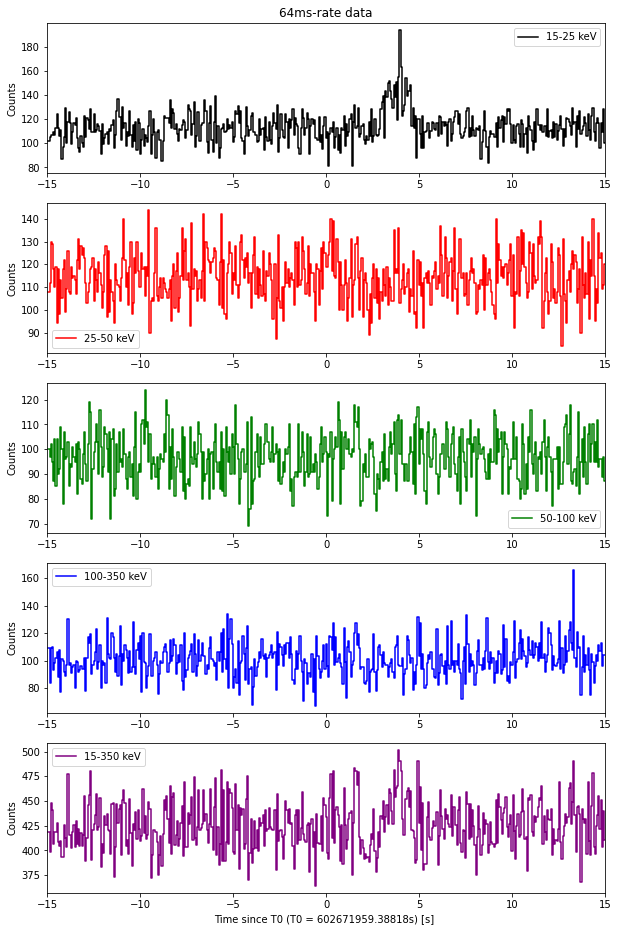

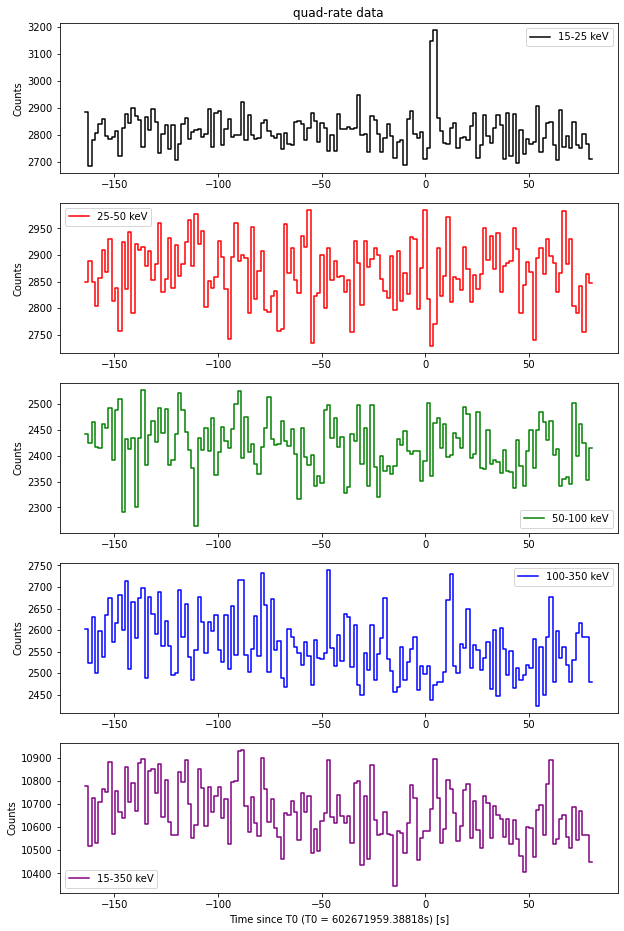

In [ ]:
s='2020-02-06T08:52:15.0'

unixtime= time.mktime(datetime.strptime(s, "%Y-%m-%dT%H:%M:%S.%f").timetuple())
print(unixtime)
T0=unix2met(unixtime)
print(T0)
obsid = getobsid(unixtime)
print(obsid)

#obsid='00021043004'

lc= get64msLC(obsid)
make64msLC(lc, T0,30)

lc= getquadsLC(obsid)
makequadsLC(lc,T0,330)

In [ ]:
2020-12-21T14:11:43.0

SyntaxError: ignored

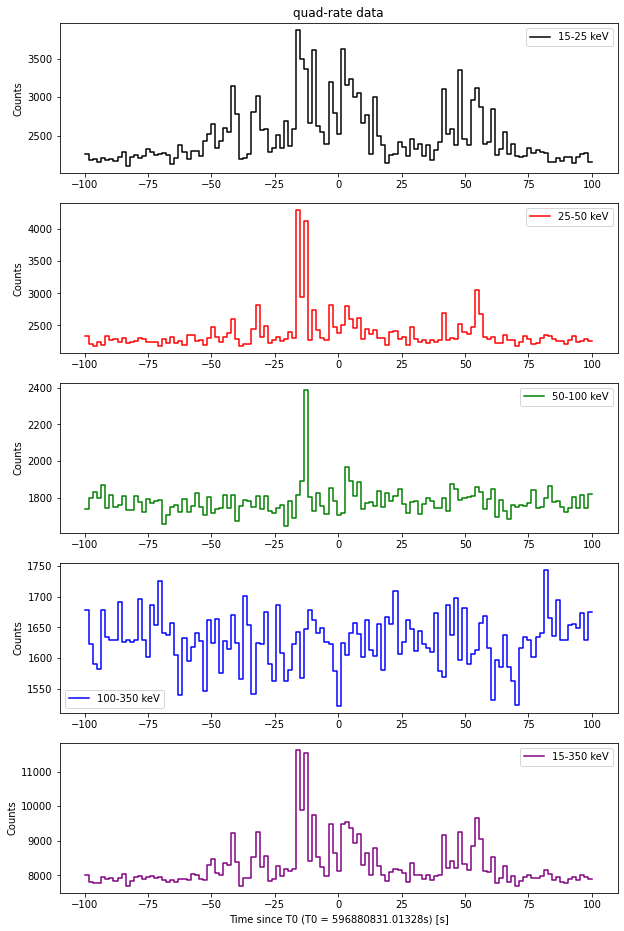

In [ ]:
ds='2019-12-01T08:13:27.0'
trig='https://swift.gsfc.nasa.gov/bat-private/batfsw/pass_20202481055/sw00994542000bevshto_uf.evt.gz_dir/index.html'
unixtime= time.mktime(datetime.strptime(s, "%Y-%m-%dT%H:%M:%S.%f").timetuple())
obsid = getobsid(unixtime)
#obsid='00993768000'
T0=unix2met(unixtime)
lc= getquadsLC(obsid)
makequadsLC(lc, T0,200)

In [ ]:
unixtime

In [ ]:
    obsid

In [ ]:
obsid

'03109320001'

In [ ]:
2020-05-19 12:59:24
1589893164.0
00973140001
SNR: 6.59  Int: 33.0  RA:223.870899  Dec:-31.385009
https://gcn.gsfc.nasa.gov/sub_sub_archive/sub_sub_200522.txt